 **Mini Project**
Yash Pandey 2K23CSUN01283


In [ ]:
# Jamboree Graduate Admission Predictor

# Predicting Graduate Admission Chances to Ivy League Colleges Using Machine Learning

# To help Jamboree in understanding what factors are important in graduate
# admissions and how these factors are interrelated among themselves.

# It will also help predict one's chances of admission given the rest of the variables.


#  ATTRIBUTES:

# 1. Serial No. : Unique row ID
# 2. GRE Score : Scores in GRE Exam (out of 340)
# 3. TOEFL Score : Scores in TOEFL Exam (out of 120)
# 4. University Rating : out of 5
# 5. SOP : Statement of Purpose strength (out of 5)
# 6. LOR : Letter of Recommendation strenght (out of 5)
# 7. CGPA : Undergraduate GPA (out of 10)
# 8. Research : Research Experience (either 0 or 1)
# 9. Chance of Admit : ranging from 0 to 1

In [ ]:

# Problem Definition:

# Predicting the Probability of Admission Based on Student Attributes and Academic Performance and How
# data analysis and machine learning be used to predict the chances of

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading data.
df = pd.read_csv("/content/jamboree_admission.csv")

In [ ]:
# Checking the basic structure.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### **original dataset Shape:**

In [ ]:
#Checking how many rows and columns in dataframe.
df.shape

# there are 500 rows and 9 columns.

(500, 9)

In [ ]:
#Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### **Dropping Unique row identifier:**

In [ ]:
# Dropping "Serial No." column as it adds no value to the dataset.

df = df.drop(["Serial No."],axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


## **Exploratory Data Analysis:**

In [ ]:
# summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Checking the number of unique GRE Scores.
df["GRE Score"].nunique()

49

In [ ]:
# Checking the number of unique TOEFL Scores.
df["TOEFL Score"].nunique()

29

In [ ]:
# Checking the count of each university rating.
df["University Rating"].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [ ]:
# Checking the count for each Statement of Purpose Strength.
df["SOP"].value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


In [ ]:
# Checking the count for each Letter of Recommendation Strength.
df.columns = df.columns.str.strip() # To strip unnecessary space in column names.
df["LOR"].value_counts()


,count
LOR,
3.0,99
4.0,94
3.5,86
4.5,63
2.5,50
5.0,50
2.0,46
1.5,11
1.0,1


In [ ]:
# Checking number of unique CGPA entries
df["CGPA"].nunique()

184

In [ ]:
# Checking number of people with Research experience
df["Research"].value_counts()

,count
Research,
1,280
0,220


In [ ]:
# Checking details of highest Chance of Admission.
df.loc[df["Chance of Admit "].idxmax()]

,24
Serial No.,25.00
GRE Score,336.00
TOEFL Score,119.00
University Rating,5.00
SOP,4.00
LOR,3.50
CGPA,9.80
Research,1.00
Chance of Admit,0.97


In [ ]:
# Checking details of lowest Chance of Admission.
df.loc[df["Chance of Admit"].idxmin()]

,92
GRE Score,298.00
TOEFL Score,98.00
University Rating,2.00
SOP,4.00
LOR,3.00
CGPA,8.03
Research,0.00
Chance of Admit,0.34


## **Checking for Null values:**

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


### **Analysis of Dataset Attributes**  

1. **Dataset Structure:**  
   - The dataset comprises 500 rows and 9 columns.  

2. **Column Details:**  
   - Columns include: **Serial No.**, **GRE Score**, **TOEFL Score**, **University Rating**, **SOP**, **LOR**, **CGPA**, **Research**, and **Chance of Admit**.  
   - **Integer columns:** Serial No., GRE Score, TOEFL Score, University Rating.  
   - **Float columns:** SOP, LOR, CGPA, Research, Chance of Admit.  

3. **Chance of Admit Statistics:**  
   - **Mean:** 0.72174.  
   - **Standard Deviation:** 0.14114.  
   - **Minimum Value:** 0.34000.  
   - **Maximum Value:** 0.97000.  

4. **Unique Values:**  
   - GRE Score: 49 unique values.  
   - TOEFL Score: 29 unique values.  
   - CGPA: 184 unique values.  

5. **Research Column Details:**  
   - The **Research** column contains only two values: 0 (No Research Experience) and 1 (With Research Experience).  
   - **Distribution:** 280 students have research experience, while 220 do not.  

6. **Extreme Chance of Admit Values:**  
   - **Maximum Chance of Admit:** 0.97 for the student at index 24.  
   - **Minimum Chance of Admit:** 0.34 for the student at index 92.  

7. **Strength of SOP and LOR:**  
   - **Statement of Purpose (SOP):** 42 students have the maximum strength of 5.0.  
   - **Letter of Recommendation (LOR):** 50 students have the maximum strength of 5.0.  

8. **University Rating:**  
   - The majority of students are rated **3** for University Rating.  

9. **Data Completeness:**  
   - There are **no missing values** in the dataset.

## **Univariate Graphical Analysis:**

In [ ]:
# Graphical Analysis - Univariate Analysis And Bivariate Analysis :
# For Continuous variables - GRE Scores, TOEFL Scores, University Rating, SOP, LOR, GPA, Chance of Admit

# VISUAL ANALYSIS : UNIVARIATE AND BIVARIATE

# FOR CONTINUOUS VARIABLES : DISTPLOT, COUNTPLOT, HISTOGRAM FOR UNIVARIATE ANALYSIS

<Axes: xlabel='GRE Score', ylabel='Count'>

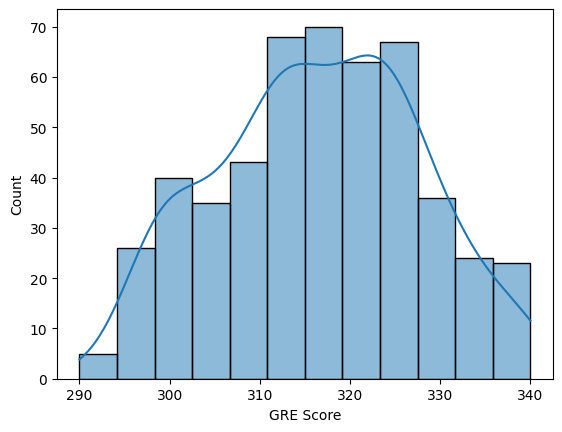

In [ ]:
# Checking frequency distribution for GRE Score using histogram.
# Shows result in terms of range (eg: 310-320)
sns.histplot(data=df, x='GRE Score', kde=True)

<Axes: xlabel='TOEFL Score', ylabel='Count'>

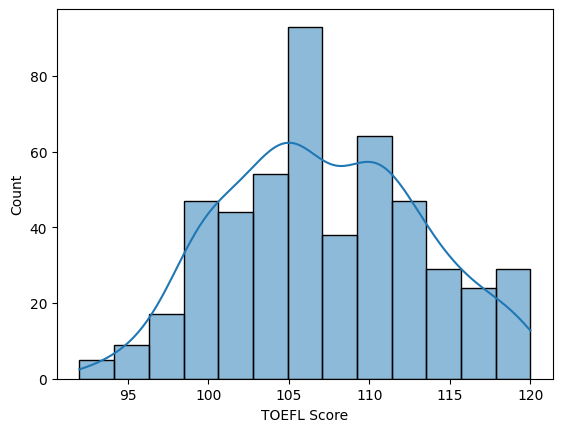

In [ ]:
# Checking frequency distribution for TOEFL Score using histogram.

sns.histplot(data=df, x='TOEFL Score', kde=True)

<Axes: xlabel='University Rating', ylabel='count'>

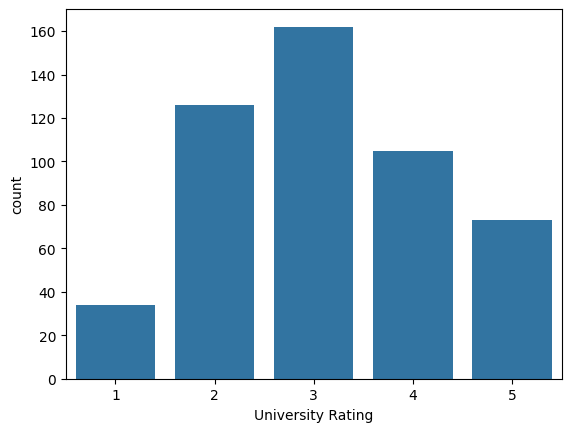

In [ ]:
# Checking the frequency/count for each value in the column University Rating.
sns.countplot(data=df, x='University Rating')

<Axes: xlabel='SOP', ylabel='count'>

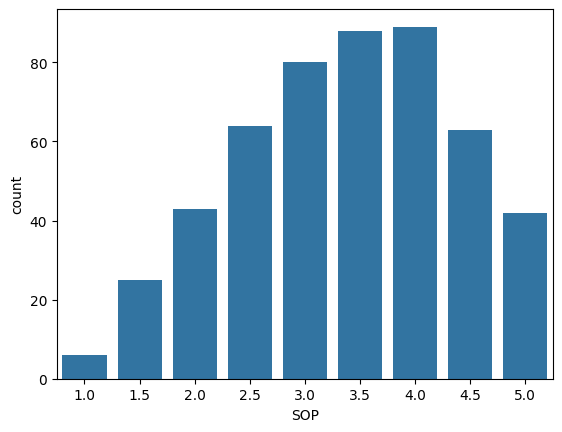

In [ ]:
# Checking the count of each value in the column SOP.
sns.countplot(x='SOP', data=df)

<Axes: xlabel='LOR', ylabel='count'>

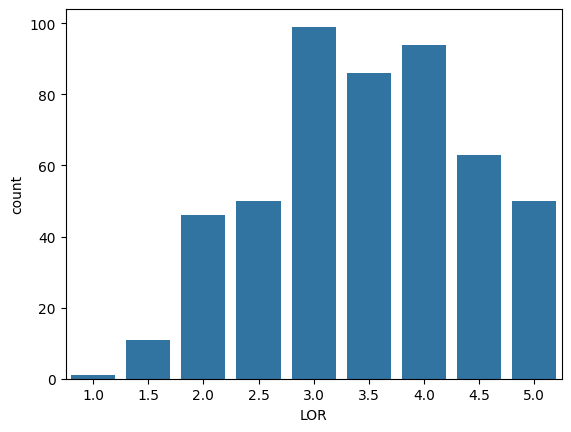

In [ ]:
# Checking the count of each value in the column LOR.
sns.countplot(x='LOR', data=df)

<Axes: xlabel='CGPA', ylabel='Count'>

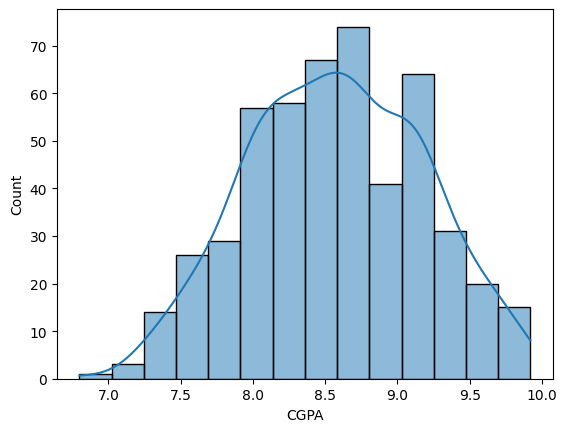

In [ ]:
# Checking the frequency distribution for CGPA.
sns.histplot(x='CGPA', data=df, kde=True)

<Axes: xlabel='Research', ylabel='count'>

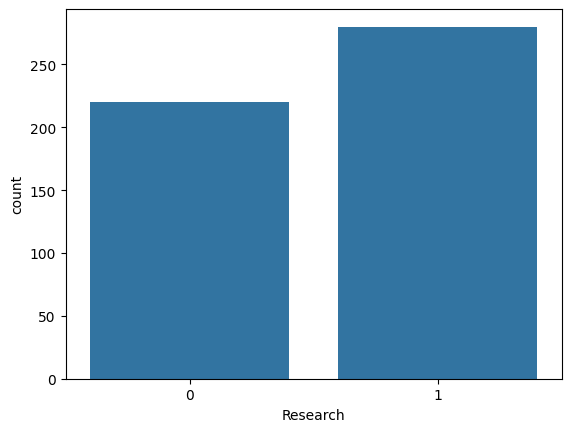

In [ ]:
# Checking the count of values in 'Research' column.
sns.countplot(x='Research', data=df)

## **Bivariate Graphical Analysis:**

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

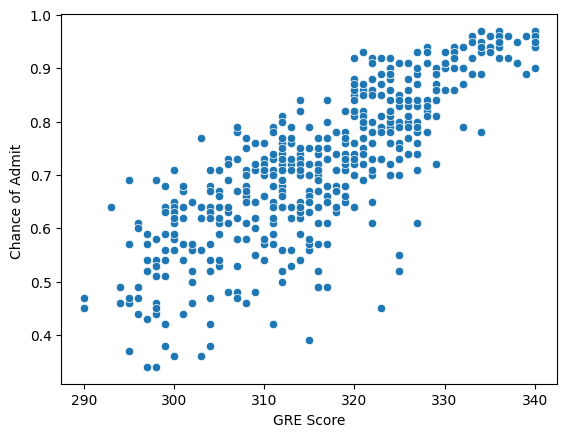

In [ ]:
# Understanding 'GRE Score' and 'Chance of Admit'
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=df)

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

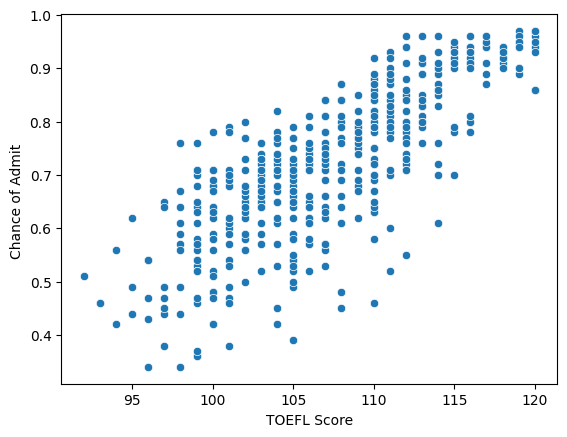

In [ ]:
# Understanding 'GRE Score' and 'Chance of Admit'
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=df)

<Axes: xlabel='University Rating', ylabel='GRE Score'>

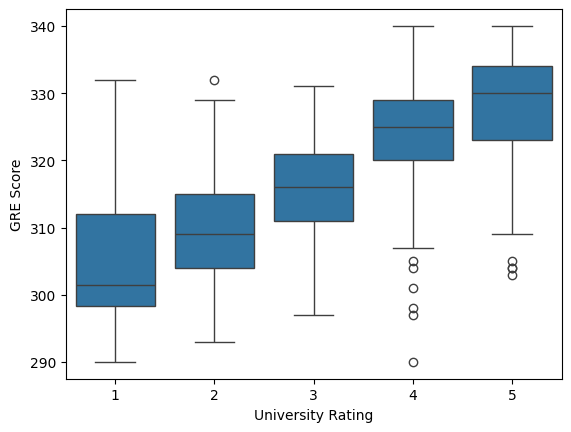

In [ ]:
# Understanding how University Rating affects GRE Score.
sns.boxplot(data=df, x='University Rating', y='GRE Score')

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

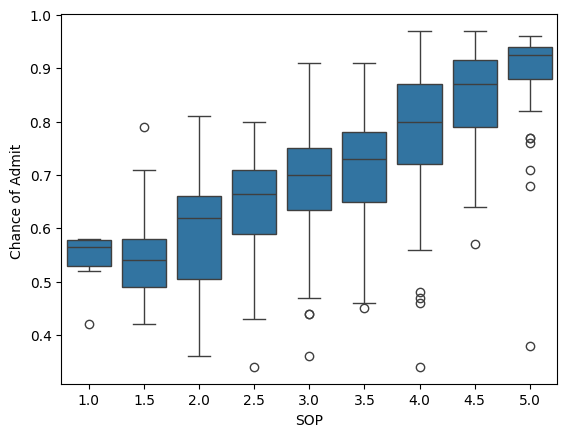

In [ ]:
# Checking correlation between SOP and Chance of Admit.
sns.boxplot(x='SOP', y='Chance of Admit', data=df)

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

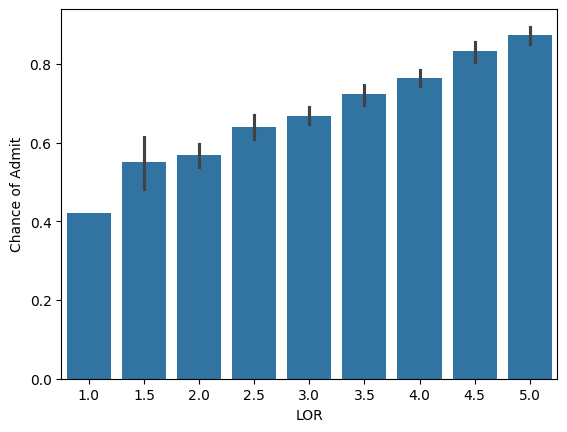

In [ ]:
#Checking correlation between LOR and Chance of Admit.
sns.barplot(x='LOR', y='Chance of Admit', data=df)

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

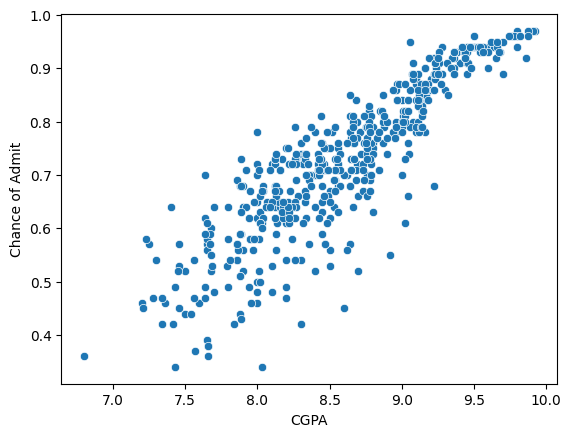

In [ ]:
# Checking correlation between CGPA and Chance of Admit.
sns.scatterplot(x='CGPA', y='Chance of Admit', data=df)

<Axes: xlabel='Research', ylabel='Chance of Admit'>

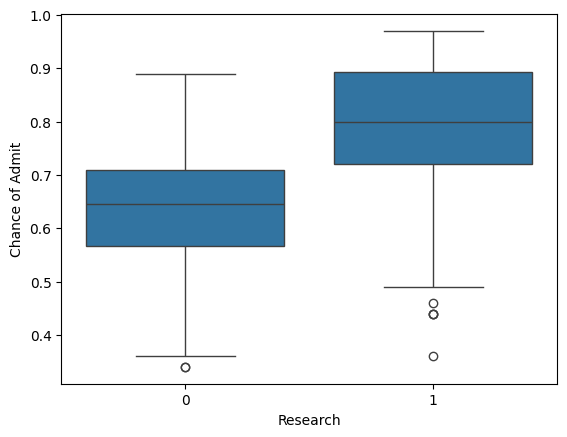

In [ ]:
# Checking how having Research Experience impacts Chances of Admit.
sns.boxplot(x='Research', y='Chance of Admit', data=df)

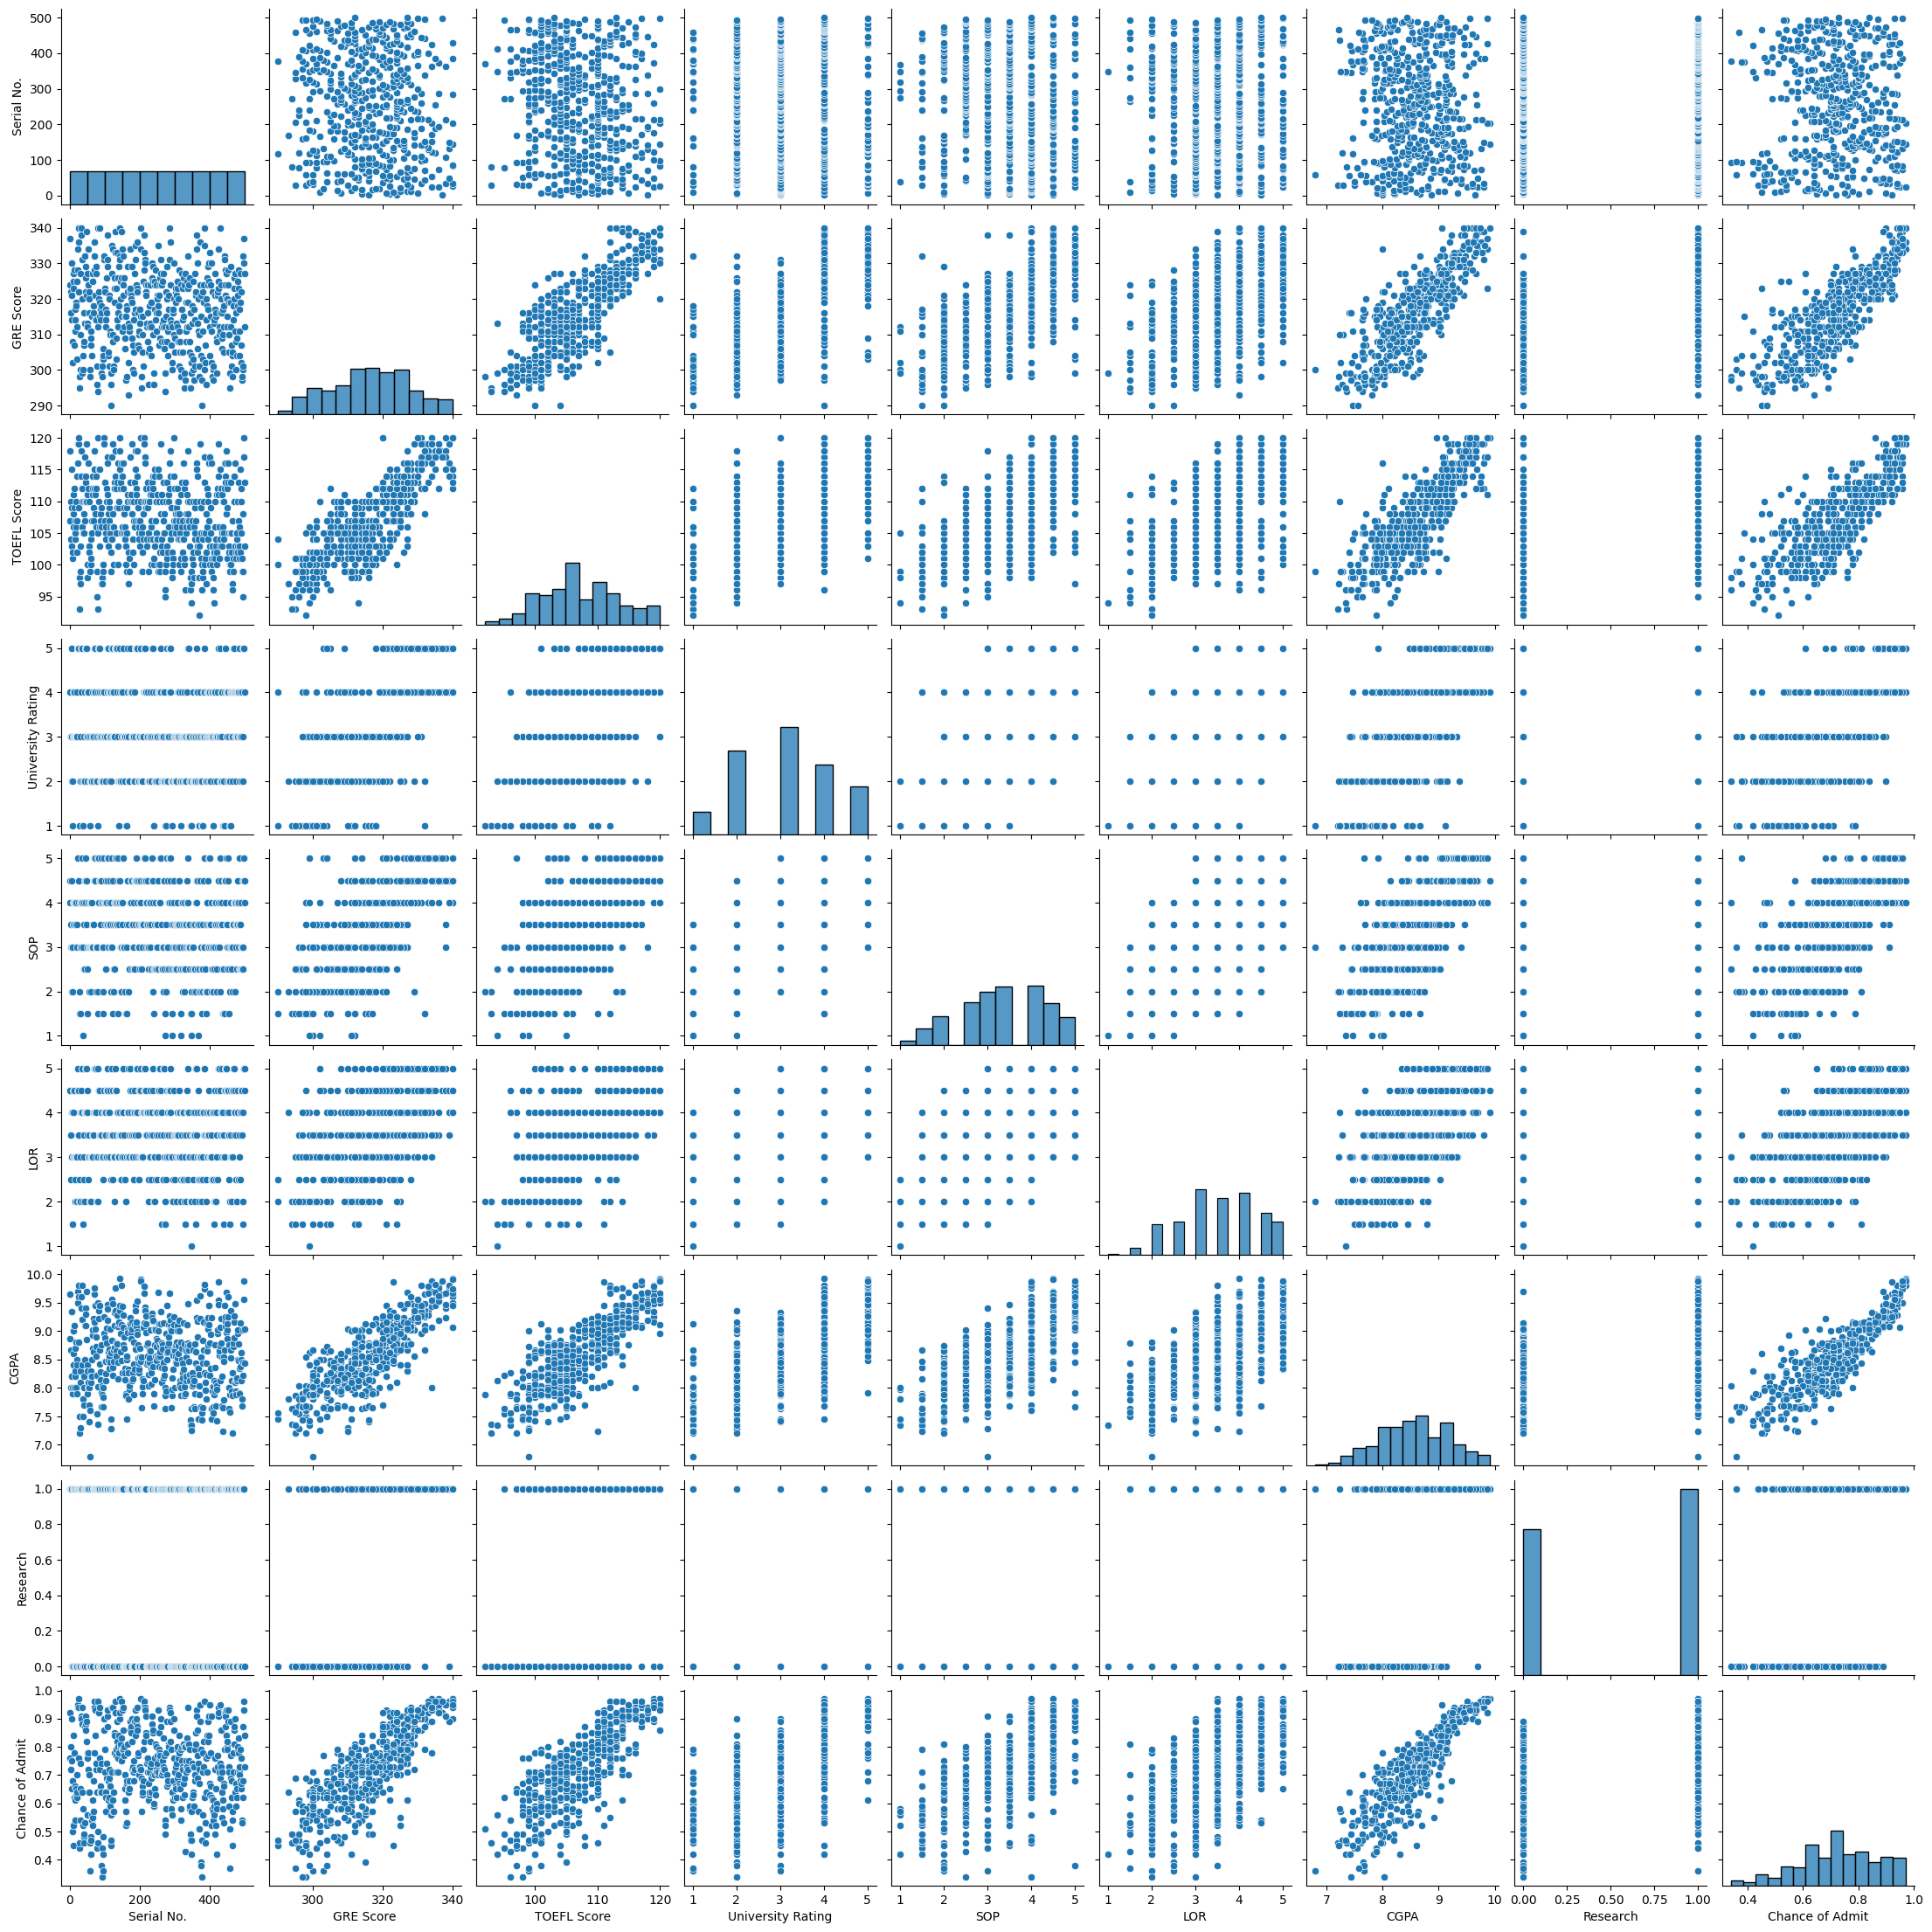

In [ ]:
# Checking the correlation between each and every variable using pairplot
sns.pairplot(df)

<Axes: >

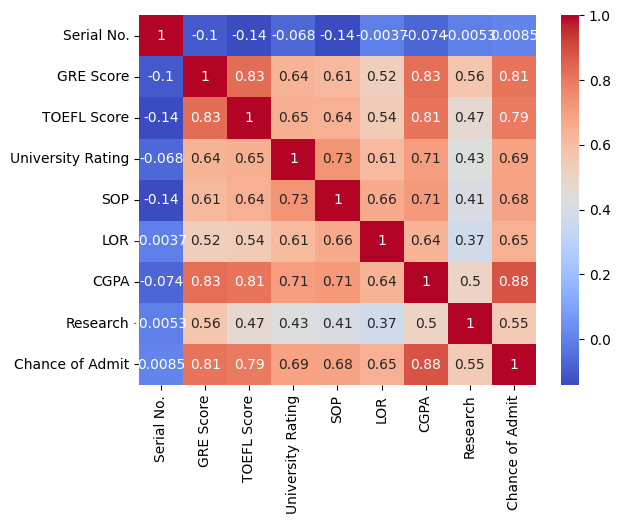

In [ ]:
# Checking correlation between every pair of variables using Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Important: Here we see that relationship between CGPA and Chance of Admit has highest value 0.88
# CGPA is the most important factor in determining chances of admission.

### **Observations on Variable Distribution and Relationships:**  

- **GRE Scores:** The majority of students have a GRE score between 310 and 320 (out of a maximum of 340).  
- **TOEFL Scores:** Over 80 students fall within the TOEFL score range of 105 to 107 (out of a maximum of 120).  
- **University Rating:** Most students have a University Rating of 3 (on a scale of 1 to 5).  
- **Research Experience:** The dataset includes 280 students with research experience and 220 without.  
- **Key Factors Influencing Admission Chances:**  
  - **CGPA** is the most significant factor affecting admission chances, exhibiting the strongest correlation.  
  - **GRE Score** is the second most influential factor, based on the heatmap analysis.  
  - Other factors, in descending order of importance, include **TOEFL Score**, **University Rating**, **SOP**, **LOR**, and **Research Experience**, as observed from the heatmap.  

## **Data Preprocessing and Model Building:**

In [ ]:
# Normalisation/Feature Scaling:
# It is used to avoid dominance of Larger scale features.
# The model should not comprehend higher numerical values as having higher importance.
# Hence all values are scaled within range of 0 and 1.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [ ]:
# 'Chance of Admit' is the target/dependent variable.
# It is dependent on all the other independent variables like GRE Score, CGPA etc.
# So we take y as dependent and x as independent variable.

y = df['Chance of Admit']
x = df.drop(['Chance of Admit'],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [ ]:
# Splitting the data into train data and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Linear Regression:**

In [ ]:

# Initialize the Linear Regression model

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(x_test)

# Model performance evaluation
print("Linear Regression Results")
print("R^2 Score:", r2_score(y_test, y_pred_linear))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))

# Display model coefficients
coefficients = pd.DataFrame(linear_model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

Linear Regression Results
R^2 Score: 0.8188432567829629
Mean Absolute Error: 0.06781373694770423
Mean Squared Error: 0.009333976817305144
                   Coefficient
GRE Score             0.193209
TOEFL Score           0.133150
University Rating     0.016310
SOP                   0.011515
LOR                   0.109448
CGPA                  0.557277
Research              0.038138


In [ ]:
# Here, we can observe that "model.coef_" value for CGPA is the highest.
# this proves our assumption of CGPA being the most important factor in determining Chance of Admit is correct
# Similarly, we see that 'SOP' and 'Chance of Admit' has the weakest correlation.
# We also observe that the MAE and MSE are low for the above Linear Regression model.
# The R^2 Score of 0.81 indicates that it is an effective model and is accurate for most data points.

## **Ridge Regression:**

In [ ]:

# Initialize Ridge Regression with alpha (regularization strength)
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train, y_train)

# Predict on test set
y_pred_ridge = ridge_model.predict(x_test)

# Ridge model performance
print("Ridge Regression Results")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

Ridge Regression Results
R^2 Score: 0.8161788497834547
Mean Absolute Error: 0.06880957824329416
Mean Squared Error: 0.009471258558650424


In [ ]:
# The model yields low MAE and MSE.
# As we observe the model's score is approximately 0.816 ~ to that of Linear Regression.

## **Lasso Regression:**

In [ ]:

# Initialize Lasso Regression with alpha
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

# Predict on test set
y_pred_lasso = lasso_model.predict(x_test)

# Lasso model performance
print("Lasso Regression Results")
print("R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression Results
R^2 Score: -0.00724844132029312
Mean Absolute Error: 0.18455238095238097
Mean Squared Error: 0.051897784391534404


In [ ]:
# COMMENT ON LASSO REGRESSION MODEL:
# The negative R^2 Score indicates that Ridge Regression is not suitable for this dataset.
# Linear and Ridge regression models have shown to yield better results for Jamboree in comparison

## **Overall Insights:**
- **CGPA** and **GRE Score** are the two most influential factors in determining admission chances.  
- There is a strong positive correlation between CGPA and GRE Score, indicating that students with higher CGPA are likely to achieve higher GRE scores.  
- **Statement of Purpose (SOP)** strength has minimal impact on admission chances.  
- A higher **University Rating** positively influences the likelihood of admission.  
- Having **Research Experience** significantly enhances admission chances.  
- Based on these findings, prioritizing **CGPA, GRE Score, TOEFL Score, LOR, University Rating, SOP, and Research**—in this order—can help effectively allocate time and resources, maximizing the probability of admission success.  
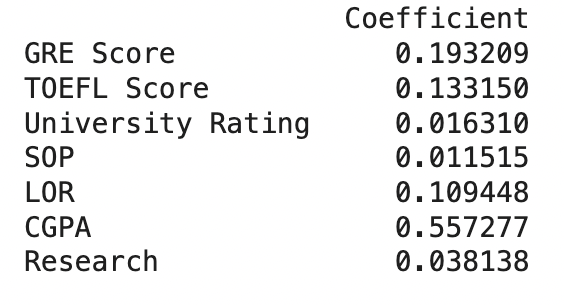


